In [1]:
import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


Easiest option

<IPython.core.display.Javascript object>


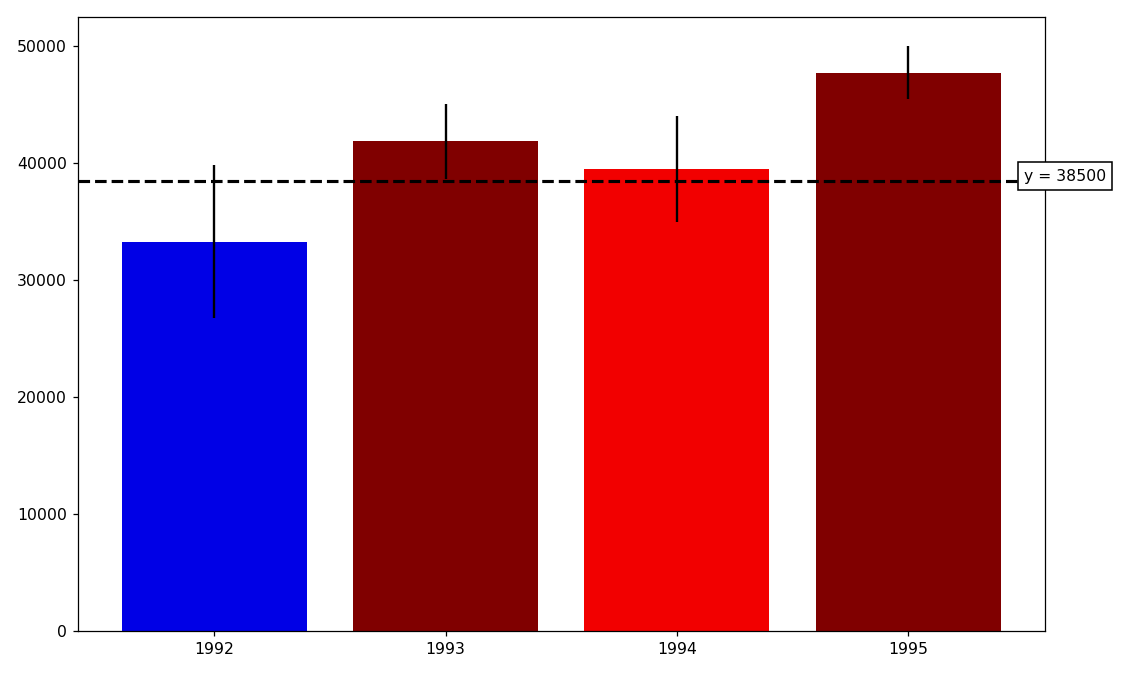

In [21]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap
from matplotlib import cm
%matplotlib notebook

df['mean'] = df.mean(axis=1) 
df['std'] = df.std(axis=1)

df['std'] = df['std']/np.sqrt(df.shape[1])

y = 38500


norm = Normalize(vmin=-1.96, vmax=1.96)
cmap = get_cmap('seismic')
df_color = pd.DataFrame([])
df_color['intensity'] = norm((df['mean']-y)/df['std'])
df_color['color'] = [cmap(x) for x in df_color['intensity']]


plt.figure(figsize=(10,6))
bar = plt.bar(df.index, df['mean'], yerr=df['std']*1.96, color=df_colors['color']);
x_ax = plt.axhline(y=y, color='k', linewidth=2, linestyle='--');
y_line = plt.text(1995.5, y, 'y = %d' %y, bbox=dict(fc='white',ec='k'));
plt.xticks(df.index, ('1992', '1993', '1994', '1995'));
plt.tight_layout()